In [8]:
import json
from pprint import pprint
import os

feature_vector_file_name = "_feature_vector.json"
file_path = f"{os.getcwd()}/data/{feature_vector_file_name}"

with open(file_path) as f:
  data = json.load(f)

pprint(data[:5])

[[0.25, 2.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 2.0, 7.5, 6.25],
 [1.75, 3.0, 0.0, 10.0, 3.0, 1.0, 2.0, 1.5, 0.833, 4.428, 9.244],
 [0.75, 4.0, 0.0, 2.0, 1.0, 0.0, 0.666, 0.222, 0.75, 6.125, 11.359],
 [1.25, 4.0, 0.0, 4.0, 3.0, 3.0, 0.5, 0.25, 1.0, 4.3, 9.209],
 [0.25, 4.0, 0.0, 0.0, 2.0, -1.0, 0.0, 0.0, 1.0, 4.142, 10.122]]


In [4]:
from sklearn.cluster import AffinityPropagation,MeanShift,DBSCAN,OPTICS
import numpy as np

data = np.array(data)

method = "AffinityPropagation"
method = "MeanShift"
method = "DBSCAN"
method = "OPTICS"

if method == "AffinityPropagation":
  clustering_result = AffinityPropagation(random_state=5).fit_predict(data)
elif method == "MeanShift":
  clustering_result = MeanShift(bandwidth=2).fit_predict(data)
elif method == "DBSCAN":
  # init eps = 0.5, min samples=5
  clustering_result = DBSCAN(eps=1, min_samples=2).fit_predict(data)
elif method == "OPTICS":
  clustering_result = OPTICS(min_samples=2).fit_predict(data)

print("dat shape; col:", len(data)," row:", len(data[0]))
print(len(clustering_result))
print(clustering_result)

dat shape; col: 348  row: 11
348
[-1 85 66 -1 -1 11 48 11 17 78 75 10 48 10 -1 78 85 15 21 -1 15 -1 64 -1
 28 28 -1 22 24 29 29 83 -1 21 89 -1 34 30 30 18 30 30 18 30 30 18 30 23
 83 -1 22 13 13 43 13 13 43 13 13 43 13 -1 82 77 -1 44 79 77 -1 44 79 -1
 60 60 60 60 59 -1 61 61 61 61 54 -1 -1 -1 27 27 27 -1 25 25 32 67 67 67
 62 80 80 80  4  4  4  4  4 -1 71 65 71 -1 71 65 19 -1 -1 19 22 28 -1 -1
 -1 -1 22 35 64  0 22 35 64 -1 -1 -1 87 51 87 -1 12 -1  6  5 51 64  0 22
 35 64  0 22 -1 -1 -1 87 52 87 16 12 50  7  8 -1 -1 -1 -1 -1 -1 -1 -1 76
 49 49 -1 24 24 36 51 85 66 77 29  3  3 23 38 55 38 -1 -1  0 29 -1 -1 84
 -1 -1 71 -1  3 81 40 40 40 40 40 -1  3 -1 -1 85 -1 -1 70 70 13 26 26 81
 -1 56 -1 16 12 50  6  8 -1 88 56 -1 37 12 -1  7  5 68 -1 80 -1 -1 68 53
 55 54 -1 53 55 58 58 59 -1 32 59 37 22 44 -1 -1 61 89 38 14 14  3 47 47
 -1 -1 -1 21 78 -1 -1 -1 -1 20 84 -1  2 46 39 46  2 46 39 -1 57 57 20 -1
 88 82 63 21 31 31 33 51 33 31 33 62 62 51 52 -1 75  1 76 41 49  1 76 41
 34 -1 36 45 22 69

/home/iharuki/zemi/team/2023/watahal_proseka-score/.venv/lib/python3.10/site-packages/sklearn/cluster/_optics.py:932: RuntimeWarning: divide by zero encountered in divide
  ratio = reachability_plot[:-1] / reachability_plot[1:]


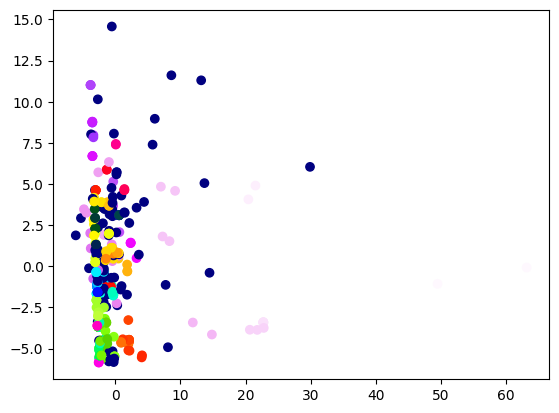

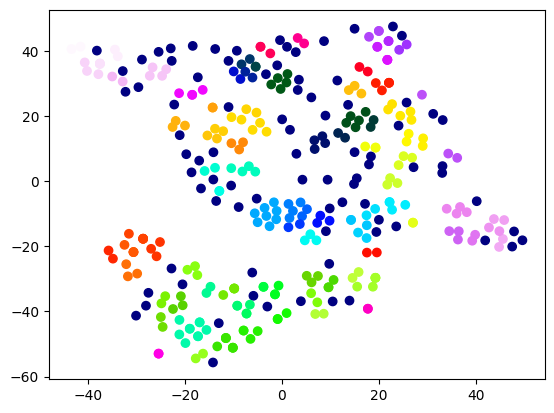

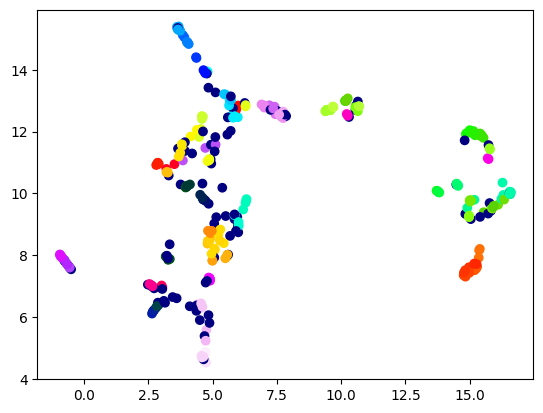

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import os

save_dir_name = "_vis-result"
dir_path = f"{os.getcwd()}/data/{save_dir_name}/"
try:
    os.mkdir(dir_path)
except:
    pass

file_explain = f"clustering_{method}"

from sklearn.decomposition import PCA
pca = PCA(n_components=2, random_state=0)
data_pca = pca.fit_transform(data)

plt.scatter(data_pca[:,0],data_pca[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(dir_path + f"{file_explain}_plot-pca.png")
plt.show()

tsne = TSNE(n_components=2, random_state=0)
data_tsne = tsne.fit_transform(data)

plt.scatter(data_tsne[:,0],data_tsne[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(dir_path + f"{file_explain}_plot-tsne.png")
plt.show()

from umap import UMAP

umap = UMAP(n_components=2, random_state=0)
data_umap = umap.fit_transform(data)

plt.scatter(data_umap[:,0],data_umap[:,1], c=clustering_result, cmap="gist_ncar")
plt.savefig(dir_path + f"{file_explain}_plot-umap.png")
plt.show()